<a href="https://colab.research.google.com/github/deborammartins/Bootcamp_Estatistica/blob/main/D%C3%A9bora_Marques_Desafios_Estat%C3%ADstica_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando os pacotes






In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from scipy.stats import normaltest

## **Frequências e Medidas**

## Desafio 1: Entendo os estudantes

Esse desafio tem como objetivo responder algumas perguntas através da
análise de dados, aprofundando o conhecimento em frequência e medidas.
Os dados que deverão ser utilizado nesse script foram baixados do kaggle,
e podem ser acessados através do link:

https://www.kaggle.com/spscientist/students-performance-in-exams

Este conjunto de dados consiste nas notas obtidas pelos alunos em várias
disciplinas e suas informações pessoais.

Variáveis:

● gender - gênero do aluno

● race/ethnicity - raça/etnia dos alunos

● parental level of education - grau de escolaridade dos pais

● lunch - tipo de almoço

● test preparation course - indica se fez curso preparatório

● math score - nota na prova de matematica

● reading score - nota na prova de leitura

● writing score - nota na prova de escrita

Dica / Passo a Passo:
1. Leia a base de dados e faça uma análise inicial, como por exemplo,
verificar o tamanho da base de dados (quantidade de linhas e
colunas) e o tipo das variáveis.
2. Alguma variável precisa ser alterada ou criada? Faça as alterações se
julgar necessária.
3. Verifique a quantidade de alunos em cada grupo racial/étnico.
4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do
gênero masculino ou feminino?
5. Analise as notas de matemática dos alunos de forma mais completa
possível.

Dica: Identifique o tipo de variável e faça todas análises que você sabe que
pode ser aplicado para esse tipo de variável. Por exemplo, se for uma
variável quantitativa calcule a média, mediana, quartis, etc. Já se for uma
variável qualitativa faça a tabela de fequência, moda, etc.

Faça também análises gráficas das sugestões abaixo ou o que achar
pertinente.

● Qual a nota média de matemática dos alunos segundo o grau de
escolaridade dos pais?

● Faça a mesma análise para as notas de leitura e escrita.

● Verifique gráficamente a relação da nota de leitura e de escrita.
Atividade extra:

Análise mais algum dado que seja interessante avaliar e represente
graficamente, através de boxplot, histogramas, barplot dentre outros
diversos de livre escolha.

In [ ]:
dados_estudantes = pd.read_csv('StudentsPerformance.csv')

In [ ]:
dados_estudantes

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### 1. Tamanho da Base e tipos de variáveis

In [ ]:
dados_estudantes.shape

(1000, 8)

In [ ]:
dados_estudantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 2. Alterações

In [ ]:
dados_estudantes.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
colunas = {
    'gender': 'gênero', 
    'race/ethnicity': 'etnia alunos', 
    'parental level of education': 'escolaridade pais', 
    'lunch': 'almoço',
    'test preparation course': 'exame preparatório', 
    'math score': 'nota matemática', 
    'reading score': 'nota leitura',
    'writing score': 'nota escrita'
}

In [ ]:
dados_estudantes = pd.DataFrame(dados_estudantes.rename(columns = colunas))
dados_estudantes

,gênero,etnia alunos,escolaridade pais,almoço,exame preparatório,nota matemática,nota leitura,nota escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
dados_estudantes['escolaridade pais'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
estudo = {
    "bachelor's degree": 'Bacharel', 
    'some college': 'Faculdade', 
    "master's degree": 'Mestrado',
    "associate's degree": 'Curso preparatório', 
    'high school': 'Ensino Médio', 
    'some high school': 'Escola Secundária'
}

In [ ]:
dados_estudantes['escolaridade pais'] = dados_estudantes['escolaridade pais'].map(estudo)

In [ ]:
dados_estudantes['almoço'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
almoco = {
    'standard': 'Padrão', 
    'free/reduced' : 'Reduzido'
}

In [ ]:
dados_estudantes['almoço'] = dados_estudantes['almoço'].map(almoco)

In [ ]:
genero = {
    'female' : 'Feminino',
    'male': 'Masculino'
}

In [ ]:
dados_estudantes['gênero'] = dados_estudantes['gênero'].map(genero)

In [ ]:
dados_estudantes

,gênero,etnia alunos,escolaridade pais,almoço,exame preparatório,nota matemática,nota leitura,nota escrita
0,Feminino,group B,Bacharel,Padrão,none,72,72,74
1,Feminino,group C,Faculdade,Padrão,completed,69,90,88
2,Feminino,group B,Mestrado,Padrão,none,90,95,93
3,Masculino,group A,Curso preparatório,Reduzido,none,47,57,44
4,Masculino,group C,Faculdade,Padrão,none,76,78,75
...,...,...,...,...,...,...,...,...
995,Feminino,group E,Mestrado,Padrão,completed,88,99,95
996,Masculino,group C,Ensino Médio,Reduzido,none,62,55,55
997,Feminino,group C,Ensino Médio,Reduzido,completed,59,71,65
998,Feminino,group D,Faculdade,Padrão,completed,68,78,77


### 3. Grupos Etnicos

In [ ]:
grupos = dados_estudantes['etnia alunos'].value_counts()
grupos.sort_values(ascending=False)

group C    319
group D    262
group B    190
group E    140
group A     89
Name: etnia alunos, dtype: int64

In [ ]:
print(f'O valor mais frequente dentro dos Grupos Etnicos é o {dados_estudantes["etnia alunos"].mode()[0]}.')

O valor mais frequente dentro dos Grupos Etnicos é o group C.


In [ ]:
grupos_genero = dados_estudantes.groupby(['etnia alunos'])['gênero'].value_counts()
grupos_genero

etnia alunos  gênero   
group A       Masculino     53
              Feminino      36
group B       Feminino     104
              Masculino     86
group C       Feminino     180
              Masculino    139
group D       Masculino    133
              Feminino     129
group E       Masculino     71
              Feminino      69
Name: gênero, dtype: int64

### 4. Alunos/Gênero

In [ ]:
dados_estudantes['gênero'].value_counts(normalize=True)

Feminino     0.518
Masculino    0.482
Name: gênero, dtype: float64

In [ ]:
print(f'O valor mais frequente dentro de Gênero é o {dados_estudantes["gênero"].mode()[0]}.')

O valor mais frequente dentro de Gênero é o Feminino.


### 5. Análise notas de Matemática

In [ ]:
media_mat = dados_estudantes['nota matemática'].mean().round(1)
max_mat = dados_estudantes['nota matemática'].max().round()
min_mat = dados_estudantes['nota matemática'].min().round()
mediana_mat = dados_estudantes['nota matemática'].median()
dp_mat = dados_estudantes['nota matemática'].std().round(2)
var_mat = dados_estudantes['nota matemática'].var().round(2)


In [ ]:
metricas_mat = pd.DataFrame({'Métricas Matemática': ['Média', 'Máx', 'Mín', 'Mediana', 'Desvio Padrão', 'Variância'], 
                         'Valores': [media_mat, max_mat, min_mat, mediana_mat, dp_mat, var_mat]})

metricas_mat.set_index('Métricas Matemática')
                         
    


,Valores
Métricas Matemática,
Média,66.10
Máx,100.00
Mín,0.00
Mediana,66.00
Desvio Padrão,15.16
Variância,229.92


In [ ]:
 quartis_mat = dados_estudantes['nota matemática'].quantile([0.25, 0.5, 0.75])
 quartis_mat

0.25    57.0
0.50    66.0
0.75    77.0
Name: nota matemática, dtype: float64

<AxesSubplot:title={'center':'Notas de Matemática por Etnia'}, xlabel='Notas', ylabel='Etnia'>

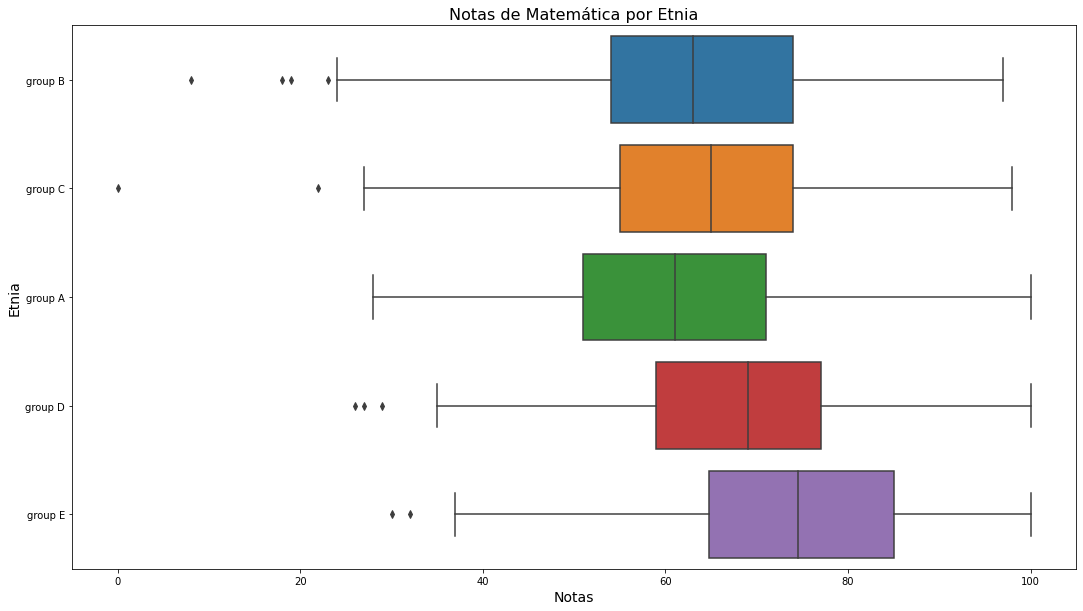

In [ ]:
ax = sns.boxplot(x = 'nota matemática', y= 'etnia alunos', data = dados_estudantes, orient='h')
ax.figure.set_size_inches(18, 10)
ax.set_title('Notas de Matemática por Etnia', fontsize = 16)
ax.set_xlabel('Notas', fontsize=14)
ax.set_ylabel('Etnia', fontsize=14)
ax

<AxesSubplot:title={'center':'Notas de Matemática por Gênero'}, xlabel='Notas', ylabel='Gênero'>

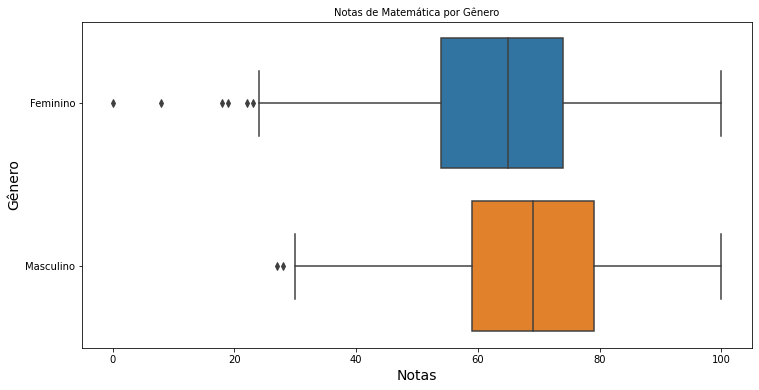

In [ ]:
ax = sns.boxplot(x = 'nota matemática', y= 'gênero', data = dados_estudantes, orient='h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Notas de Matemática por Gênero', fontsize = 10)
ax.set_xlabel('Notas', fontsize=14)
ax.set_ylabel('Gênero', fontsize=14)
ax

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição das Notas em Matemática'}, xlabel='Notas', ylabel='Density'>

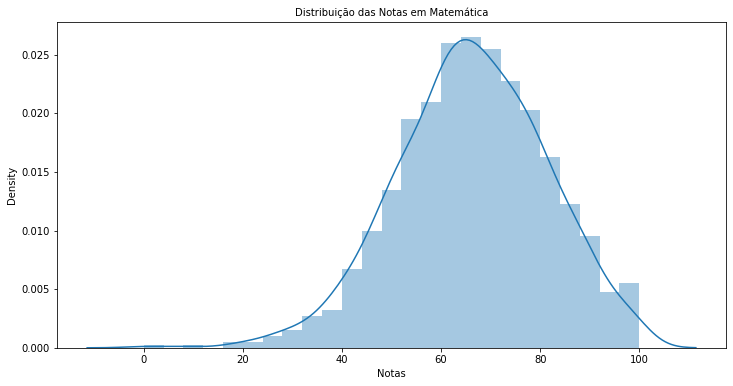

In [ ]:
ax = sns.distplot(x = dados_estudantes['nota matemática'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das Notas em Matemática', fontsize = 10)
ax.set_xlabel('Notas', fontsize = 10)
ax

### Análise Notas Leitura

In [ ]:
media_lei = dados_estudantes['nota leitura'].mean().round(1)
max_lei = dados_estudantes['nota leitura'].max().round()
min_lei = dados_estudantes['nota leitura'].min().round()
mediana_lei = dados_estudantes['nota leitura'].median()
dp_lei = dados_estudantes['nota leitura'].std().round(2)
var_lei = dados_estudantes['nota leitura'].var().round(2)

In [ ]:
metricas_lei = pd.DataFrame({'Métricas Leitura': ['Média', 'Máx', 'Mín', 'Mediana', 'Desvio Padrão', 'Variância'], 
                         'Valores': [media_lei, max_lei, min_lei, mediana_lei, dp_lei, var_lei]})

metricas_lei.set_index('Métricas Leitura')

,Valores
Métricas Leitura,
Média,69.20
Máx,100.00
Mín,17.00
Mediana,70.00
Desvio Padrão,14.60
Variância,213.17


In [ ]:
 quartis_lei = dados_estudantes['nota leitura'].quantile([0.25, 0.5, 0.75])
 quartis_lei

0.25    59.0
0.50    70.0
0.75    79.0
Name: nota leitura, dtype: float64

<AxesSubplot:title={'center':'Notas de Leitura por Etnia'}, xlabel='Notas', ylabel='Etnia'>

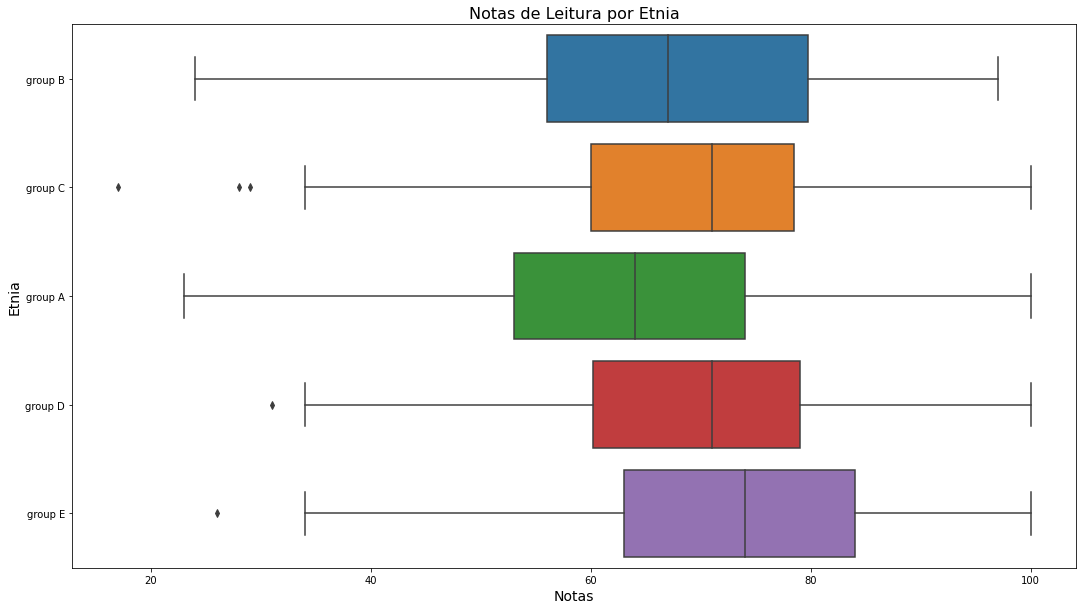

In [ ]:
ax = sns.boxplot(x = 'nota leitura', y= 'etnia alunos', data = dados_estudantes, orient='h')
ax.figure.set_size_inches(18, 10)
ax.set_title('Notas de Leitura por Etnia', fontsize = 16)
ax.set_xlabel('Notas', fontsize=14)
ax.set_ylabel('Etnia', fontsize=14)
ax

<AxesSubplot:title={'center':'Notas de Leitura por Gênero'}, xlabel='Notas', ylabel='Gênero'>

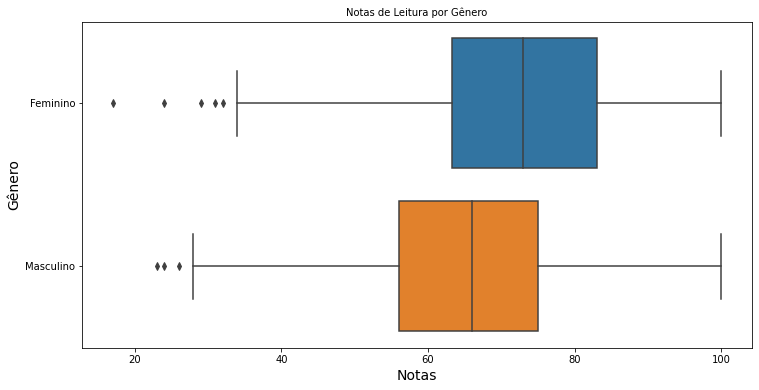

In [ ]:
ax = sns.boxplot(x = 'nota leitura', y= 'gênero', data = dados_estudantes, orient='h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Notas de Leitura por Gênero', fontsize = 10)
ax.set_xlabel('Notas', fontsize=14)
ax.set_ylabel('Gênero', fontsize=14)
ax

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição das Notas em Leitura'}, xlabel='Notas', ylabel='Density'>

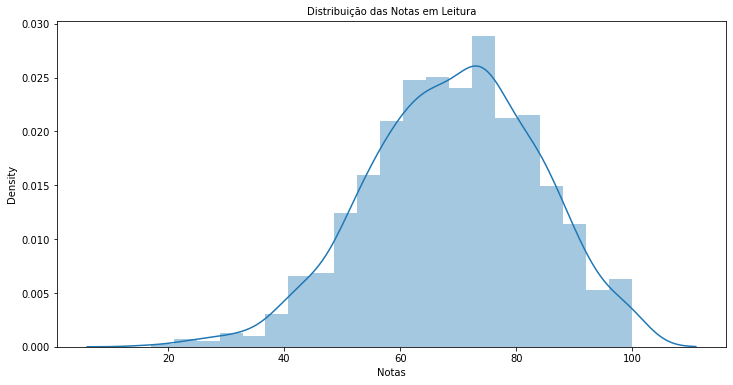

In [ ]:
ax = sns.distplot(x = dados_estudantes['nota leitura'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das Notas em Leitura', fontsize = 10)
ax.set_xlabel('Notas', fontsize = 10)
ax

### Análise Notas Escrita

In [ ]:
media_es = dados_estudantes['nota escrita'].mean().round(1)
max_es = dados_estudantes['nota escrita'].max().round()
min_es = dados_estudantes['nota escrita'].min().round()
mediana_es = dados_estudantes['nota escrita'].median()
dp_es = dados_estudantes['nota escrita'].std().round(2)
var_es = dados_estudantes['nota escrita'].var().round(2)

In [ ]:
metricas_es = pd.DataFrame({'Métricas Escrita': ['Média', 'Máx', 'Mín', 'Mediana', 'Desvio Padrão', 'Variância'], 
                         'Valores': [media_es, max_es, min_es, mediana_es, dp_es, var_es]})

metricas_es.set_index('Métricas Escrita')

,Valores
Métricas Escrita,
Média,68.10
Máx,100.00
Mín,10.00
Mediana,69.00
Desvio Padrão,15.20
Variância,230.91


In [ ]:
 quartis_es = dados_estudantes['nota escrita'].quantile([0.25, 0.5, 0.75])
 quartis_es

0.25    57.75
0.50    69.00
0.75    79.00
Name: nota escrita, dtype: float64

<AxesSubplot:title={'center':'Notas de Escrita por Etnia'}, xlabel='Notas', ylabel='Etnia'>

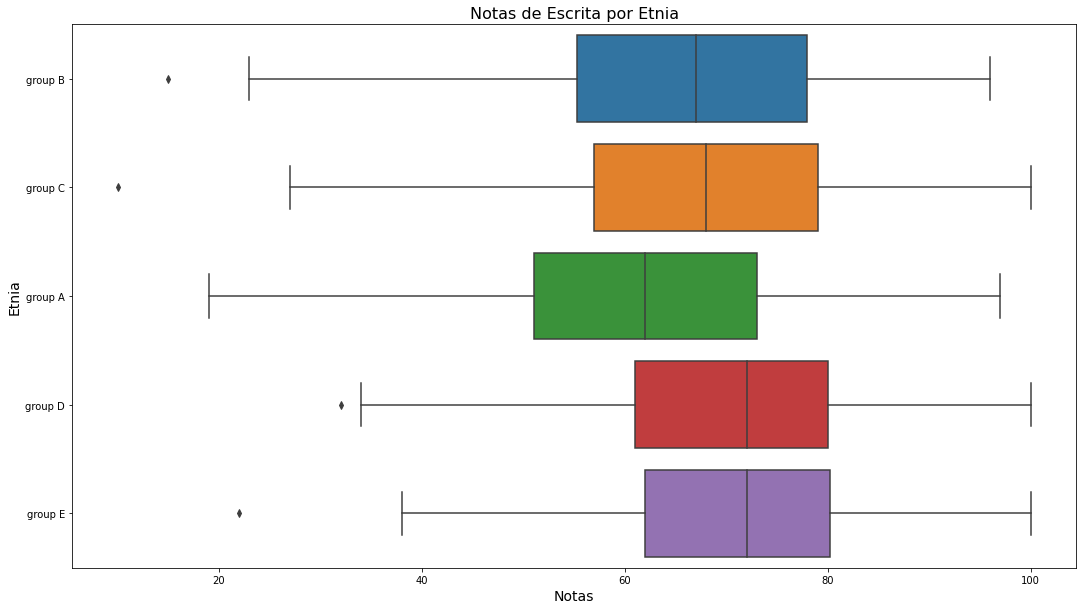

In [ ]:
ax = sns.boxplot(x = 'nota escrita', y= 'etnia alunos', data = dados_estudantes, orient='h')
ax.figure.set_size_inches(18, 10)
ax.set_title('Notas de Escrita por Etnia', fontsize = 16)
ax.set_xlabel('Notas', fontsize=14)
ax.set_ylabel('Etnia', fontsize=14)
ax

<AxesSubplot:title={'center':'Notas de Escrita por Gênero'}, xlabel='Notas', ylabel='Gênero'>

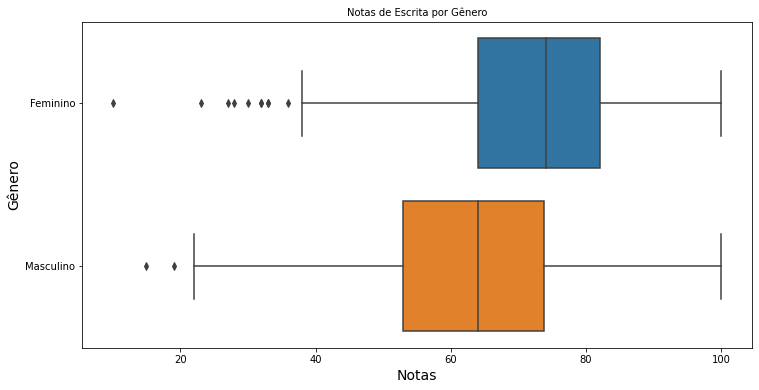

In [ ]:
ax = sns.boxplot(x = 'nota escrita', y= 'gênero', data = dados_estudantes, orient='h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Notas de Escrita por Gênero', fontsize = 10)
ax.set_xlabel('Notas', fontsize=14)
ax.set_ylabel('Gênero', fontsize=14)
ax

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição das Notas em Escrita'}, xlabel='Notas', ylabel='Density'>

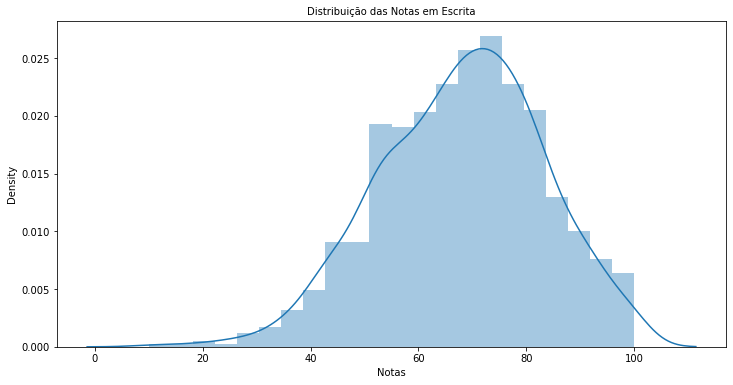

In [ ]:
ax = sns.distplot(x = dados_estudantes['nota escrita'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das Notas em Escrita', fontsize = 10)
ax.set_xlabel('Notas', fontsize = 10)
ax

### Correlação entre Leitura e Escrita

R: As variáveis Nota Leitura e Nota Escrita possuem uma intensidade de relação elevada. Podemos concluir que alunos que alunos que possuem maiores notas em Leitura também possuem maiores notas em Escrita.

In [ ]:
rxy = dados_estudantes[['nota leitura', 'nota escrita']].corr()
rxy

,nota leitura,nota escrita
nota leitura,1.000000,0.954598
nota escrita,0.954598,1.000000


In [ ]:
x = dados_estudantes['nota leitura']
y = dados_estudantes['nota escrita']

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota leitura', ylabel='nota escrita'>

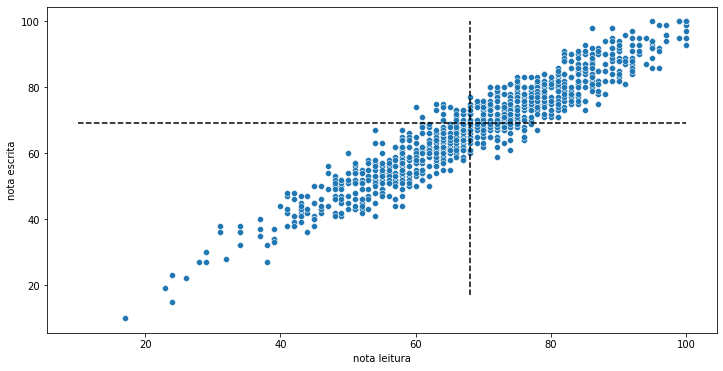

In [ ]:
ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media_lei, xmin=min_es, xmax=max_es, colors='black', linestyles='dashed')
ax.vlines(x = media_es, ymin=min_lei, ymax=max_lei, colors='black', linestyles='dashed')
ax

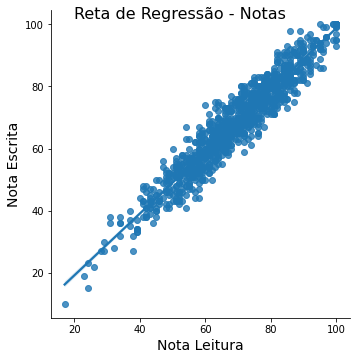

In [ ]:
ax = sns.lmplot(x = 'nota leitura', y = 'nota escrita', data=dados_estudantes)
ax.fig.suptitle('Reta de Regressão - Notas', fontsize=16)
ax.set_xlabels('Nota Leitura', fontsize=14)
ax.set_ylabels('Nota Escrita', fontsize=14)
ax

### Análise Grau de escolaridade dos pais

R: Pais com maior nível de Escolaridade tem filhos com maiores notas médias.

In [ ]:
media_mat_pais = dados_estudantes.groupby(['escolaridade pais'])['nota matemática'].mean().round(1)
media_mat_pais.sort_values(ascending=False)

escolaridade pais
Mestrado              69.7
Bacharel              69.4
Curso preparatório    67.9
Faculdade             67.1
Escola Secundária     63.5
Ensino Médio          62.1
Name: nota matemática, dtype: float64

In [ ]:
media_mat_pais = dados_estudantes.groupby(['escolaridade pais'])['nota leitura'].mean().round(1)
media_mat_pais.sort_values(ascending=False)

escolaridade pais
Mestrado              75.4
Bacharel              73.0
Curso preparatório    70.9
Faculdade             69.5
Escola Secundária     66.9
Ensino Médio          64.7
Name: nota leitura, dtype: float64

In [ ]:
media_mat_pais = dados_estudantes.groupby(['escolaridade pais'])['nota escrita'].mean().round(1)
media_mat_pais.sort_values(ascending=False)

escolaridade pais
Mestrado              75.7
Bacharel              73.4
Curso preparatório    69.9
Faculdade             68.8
Escola Secundária     64.9
Ensino Médio          62.4
Name: nota escrita, dtype: float64

### Conclusões

- O grupo Etnico C é o que tem maior representação dentro todos;

- O gênero feminino representa 51% dos estudantes;

- O gênero masculino apresenta as maiores médias em Matemática;

- O gênero feminino apresenta as maiores médias em Leitura e Escrita;

- O grupo Etnico E apresenta as maiores médias em Matemática e Leitura;

- Os grupos Etnicos D e E apresentam as maiores médias em Escrita;

- As médias em Leitura e Escrita apresentam forte correlação, indicando que o desempenho dos estudantes em ambas as disciplinas está interligado;

- Estudantes com pais que possuem grau de escolaridade nível Mestrado apresentam maiores médias nas 3 disciplinas.

##       **Probabilidade e Amostragem**











## Desafio 1:

Suponha que você trabalha em uma empresa de produtos de beleza populares e, com
a pandemia, você suspeita que o perfil de seus clientes mudou. O time de marketing,
pediu a sua ajuda e gostaria de entender se 
1. isso de fato aconteceu e 
2. quais as
diferenças do novo perfil de clientes para o antigo, pois assim poderiam personalizar
melhor os seus anúncios. Para isso, eles te enviaram a base de dados
(desafio_01_consumidor.csv). Como você poderia ajudá-los?

Para responder esse desafio:

**A base de dados:** desafio_01_consumidor.csv contém informações de seus clientes
(anonimizados) no período pré e pós pandemia. A coluna "pré-pandemia" indica se o
dado é pré-pandemia ou não, *sendo 1, caso positivo ou 0 caso negativo.*

Dica / Passo a Passo:
1. Entenda a distribuição de variáveis como de idade / renda / regiao /
produtos mais comprados antes e depois da pandemia

a. Identifique as distribuições

b. Plote histogramas / boxplots

2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia
provar estatisticamente que essas diferenças são significativas ? (pergunta
extra)
3. Suponha agora que os dados recebidos são somente uma amostra da sua
população total de clientes. Suponha que a sua "população" de clientes
verdadeira é de 100000. Qual o tamanho da amostra necessária para
chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A
base informada é suficiente? E com uma margem de erro de 10%?

In [ ]:
dados = pd.read_csv('dados.csv')

In [ ]:
dados = pd.DataFrame(dados)
dados

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


In [ ]:
dados = dados.sort_values(by = 'pre-pandemia', ascending = False)
dados

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
64,XXXXXXX21,36,14108,desodorante,Nordeste,1
74,XXXXXXX73,23,5112,base,Centro-Oeste,1
73,XXXXXXX23,22,6525,batom,Nordeste,1
72,XXXXXXX17,29,11375,batom,Sul,1
...,...,...,...,...,...,...
131,XXXXXXX63,47,13743,antissinais,Norte,0
130,XXXXXXX69,37,16727,sombra,Nordeste,0
129,XXXXXXX69,24,14367,antissinais,Nordeste,0
128,XXXXXXX10,46,7521,antissinais,Norte,0


In [ ]:
pandemia_valores = dados['pre-pandemia'].value_counts()
pandemia_valores

0    102
1    101
Name: pre-pandemia, dtype: int64

In [ ]:
dados_pre = dados.head(101)
dados_pre

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
64,XXXXXXX21,36,14108,desodorante,Nordeste,1
74,XXXXXXX73,23,5112,base,Centro-Oeste,1
73,XXXXXXX23,22,6525,batom,Nordeste,1
72,XXXXXXX17,29,11375,batom,Sul,1
...,...,...,...,...,...,...
31,XXXXXXX23,30,23015,batom,Sul,1
30,XXXXXXX36,66,2558,desodorante,Nordeste,1
29,XXXXXXX32,38,3025,desodorante,Nordeste,1
28,XXXXXXX14,34,5990,batom,Nordeste,1


In [ ]:
dados_pos = dados.tail(102)
dados_pos

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
170,XXXXXXX34,49,8201,sombra,Nordeste,0
167,XXXXXXX99,37,12617,desodorante,Sul,0
168,XXXXXXX87,52,11494,desodorante,Sul,0
169,XXXXXXX56,56,14149,desodorante,Sul,0
175,XXXXXXX19,61,21422,batom,Sudeste,0
...,...,...,...,...,...,...
131,XXXXXXX63,47,13743,antissinais,Norte,0
130,XXXXXXX69,37,16727,sombra,Nordeste,0
129,XXXXXXX69,24,14367,antissinais,Nordeste,0
128,XXXXXXX10,46,7521,antissinais,Norte,0


### Bloco Idade


In [ ]:
media_idade_pre = dados_pre['idade'].mean().round()
max_idade_pre = dados_pre['idade'].max()
min_idade_pre = dados_pre['idade'].min()
dp_pre = dados_pre['idade'].std().round(2)
var_pre = dados_pre['idade'].var().round(2)

In [ ]:
max_idade_pos = dados_pos['idade'].max()
media_idade_pos = dados_pos['idade'].mean().round()
min_idade_pos = dados_pos['idade'].min()
dp_pos = dados_pos['idade'].std().round(2) 
var_pos = dados_pos['idade'].var().round(2)

In [ ]:
metricas_idade = pd.DataFrame({'Métricas Idade': ['Média', 'Máx', 'Mín', 'Desvio Padrão', 'Variância'], 
                         'Pré': [media_idade_pre, max_idade_pre, min_idade_pre, dp_pre, var_pre],
                         'Pós': [media_idade_pos, max_idade_pos, min_idade_pos, dp_pos, var_pos]})
metricas_idade.set_index('Métricas Idade')

,Pré,Pós
Métricas Idade,,
Média,40.00,45.00
Máx,80.00,77.00
Mín,16.00,15.00
Desvio Padrão,15.02,13.37
Variância,225.49,178.84


In [ ]:
ranges = [15, 20, 30, 40, 50, 60, 70, 80]
dados_pre['idade_ranges'] = pd.cut(dados_pre['idade'], bins=ranges, labels=['15 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80'])
dados_pre

<ipython-input-70-b2a3e865b7c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_pre['idade_ranges'] = pd.cut(dados_pre['idade'], bins=ranges, labels=['15 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80'])


,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia,idade_ranges
0,XXXXXXX72,30,7452,batom,Sudeste,1,21 - 30
64,XXXXXXX21,36,14108,desodorante,Nordeste,1,31 - 40
74,XXXXXXX73,23,5112,base,Centro-Oeste,1,21 - 30
73,XXXXXXX23,22,6525,batom,Nordeste,1,21 - 30
72,XXXXXXX17,29,11375,batom,Sul,1,21 - 30
...,...,...,...,...,...,...,...
31,XXXXXXX23,30,23015,batom,Sul,1,21 - 30
30,XXXXXXX36,66,2558,desodorante,Nordeste,1,61 - 70
29,XXXXXXX32,38,3025,desodorante,Nordeste,1,31 - 40
28,XXXXXXX14,34,5990,batom,Nordeste,1,31 - 40


In [ ]:
ranges = [15, 20, 30, 40, 50, 60, 70, 80]
dados_pos['idade_ranges'] = pd.cut(dados_pos['idade'], bins=ranges, labels=['15 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80'])
dados_pos

<ipython-input-71-4e2538afa499>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_pos['idade_ranges'] = pd.cut(dados_pos['idade'], bins=ranges, labels=['15 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80'])


,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia,idade_ranges
170,XXXXXXX34,49,8201,sombra,Nordeste,0,41 - 50
167,XXXXXXX99,37,12617,desodorante,Sul,0,31 - 40
168,XXXXXXX87,52,11494,desodorante,Sul,0,51 - 60
169,XXXXXXX56,56,14149,desodorante,Sul,0,51 - 60
175,XXXXXXX19,61,21422,batom,Sudeste,0,61 - 70
...,...,...,...,...,...,...,...
131,XXXXXXX63,47,13743,antissinais,Norte,0,41 - 50
130,XXXXXXX69,37,16727,sombra,Nordeste,0,31 - 40
129,XXXXXXX69,24,14367,antissinais,Nordeste,0,21 - 30
128,XXXXXXX10,46,7521,antissinais,Norte,0,41 - 50


### Bloco Renda

In [ ]:
media_renda_pre = dados_pre['renda'].mean().round(2)
max_renda_pre = dados_pre['renda'].max().round(5)
min_renda_pre = dados_pre['renda'].min().round(5)
dp_renda_pre = dados_pre['renda'].std().round(2), 
var_renda_pre = dados_pre['renda'].var().round(2)

In [ ]:
media_renda_pos = dados_pos['renda'].mean().round(2)
max_renda_pos = dados_pos['renda'].max().round(5)
min_renda_pos = dados_pos['renda'].min().round(5)
dp_renda_pos = dados_pos['renda'].std().round(2)
var_renda_pos = dados_pos['renda'].var().round(2)

In [ ]:
metricas_renda = pd.DataFrame({'Métricas Renda': ['Média', 'Máx', 'Mín', 'Desvio Padrão', 'Variância'], 
                         'Pré': [media_renda_pre, max_renda_pre, min_renda_pre, dp_renda_pre, var_renda_pre],
                         'Pós': [media_renda_pos, max_renda_pos, min_renda_pos, dp_renda_pos, var_renda_pos]})
metricas_renda.set_index('Métricas Renda')

,Pré,Pós
Métricas Renda,,
Média,9180.64,13968.50
Máx,24090,30000.00
Mín,110,1995.00
Desvio Padrão,"(6007.68,)",5641.38
Variância,36092191.59,31825218.45


### Bloco Produto

In [ ]:
produto_pre = dados_pre['produto'].value_counts(normalize=True).round(2)
produto_pre

batom          0.60
desodorante    0.20
antissinais    0.09
perfume        0.04
sombra         0.04
base           0.03
Name: produto, dtype: float64

In [ ]:
produto_pos = dados_pos['produto'].value_counts(normalize=True).round(2)
produto_pos

desodorante    0.45
antissinais    0.20
batom          0.15
sombra         0.09
perfume        0.08
base           0.04
Name: produto, dtype: float64

### Bloco Regiao

In [ ]:
regiao_pre = pd.DataFrame(dados_pre['regiao-BR'].value_counts(normalize=True).round(2))
regiao_pre.rename(columns={'regiao-BR':'%'})


,%
Sul,0.29
Nordeste,0.26
Sudeste,0.21
Centro-Oeste,0.17
Norte,0.08


In [ ]:
regiao_pos = pd.DataFrame(dados_pos['regiao-BR'].value_counts(normalize=True).round(2))
regiao_pos.rename(columns={'regiao-BR':'%'})

,%
Sul,0.41
Nordeste,0.25
Sudeste,0.18
Norte,0.09
Centro-Oeste,0.08


In [ ]:
regioes = pd.concat([regiao_pre.assign(dataset='Pré'), regiao_pos.assign(dataset='Pós')])

### Análises Gráficas

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Idade Pré-Pandemia'}, xlabel='Idade', ylabel='Density'>

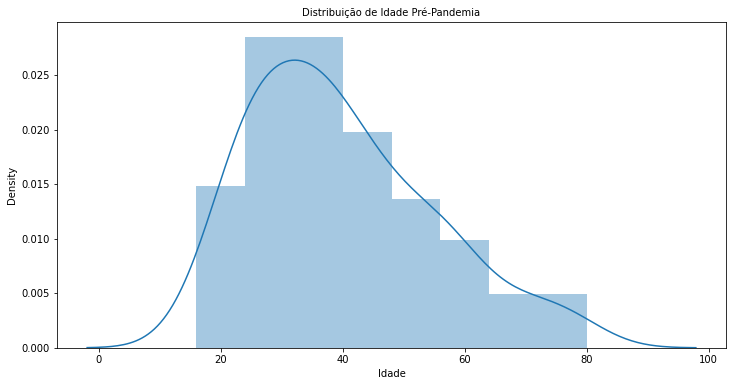

In [ ]:
ax = sns.distplot(x = dados_pre['idade'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Idade Pré-Pandemia', fontsize = 10)
ax.set_xlabel('Idade', fontsize = 10)
ax

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Idade Pós Pandemia'}, xlabel='Idade', ylabel='Density'>

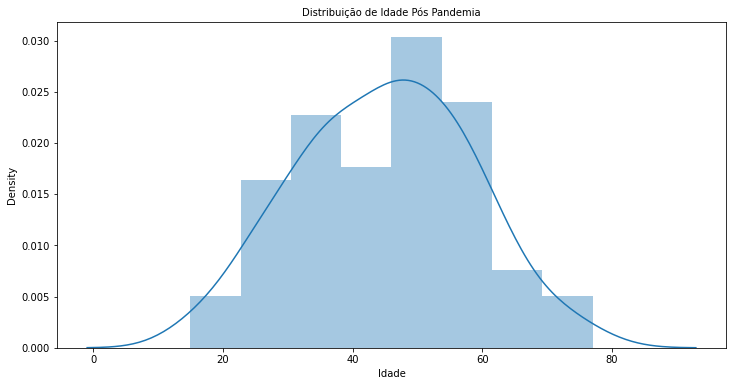

In [ ]:
ax = sns.distplot(x = dados_pos['idade'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Idade Pós Pandemia', fontsize = 10)
ax.set_xlabel('Idade', fontsize = 10)
ax

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Renda Pré-Pandemia'}, xlabel='Renda', ylabel='Density'>

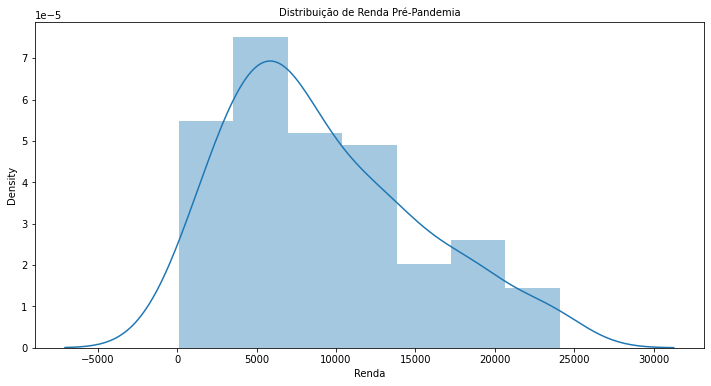

In [ ]:
ax = sns.distplot(x = dados_pre['renda'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Renda Pré-Pandemia', fontsize = 10)
ax.set_xlabel('Renda', fontsize = 10)
ax

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Renda Pós Pandemia'}, xlabel='Renda', ylabel='Density'>

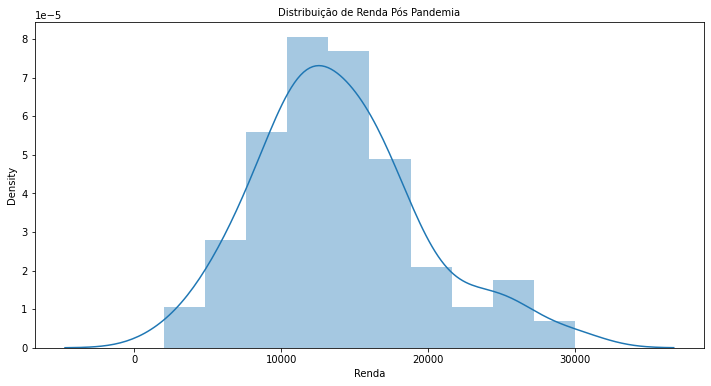

In [ ]:
ax = sns.distplot(x = dados_pos['renda'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Renda Pós Pandemia', fontsize = 10)
ax.set_xlabel('Renda', fontsize = 10)
ax

<AxesSubplot:title={'center':'Renda Pré X Idade Pré'}, xlabel='Renda', ylabel='Idade'>

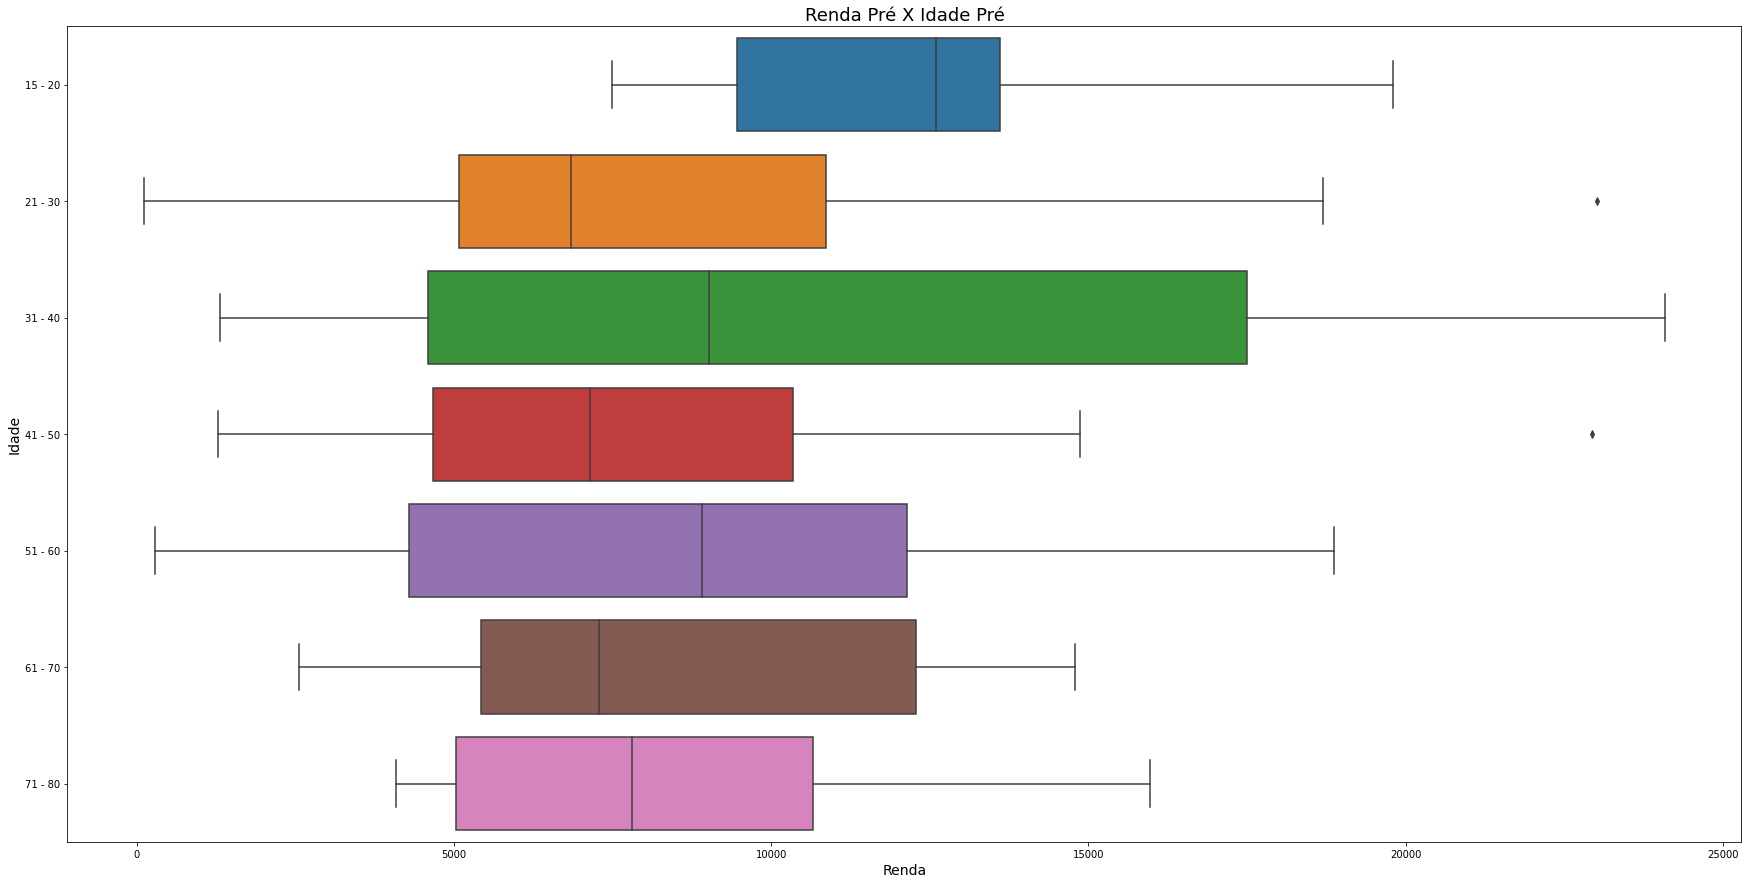

In [ ]:
ax = sns.boxplot(x = "renda", y = "idade_ranges", data = dados_pre, orient='h')
ax.figure.set_size_inches(30,15)
ax.set_title('Renda Pré X Idade Pré', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax.set_ylabel('Idade', fontsize=14)
ax

<AxesSubplot:title={'center':'Renda Pos X Idade Pos'}, xlabel='Renda', ylabel='Idade'>

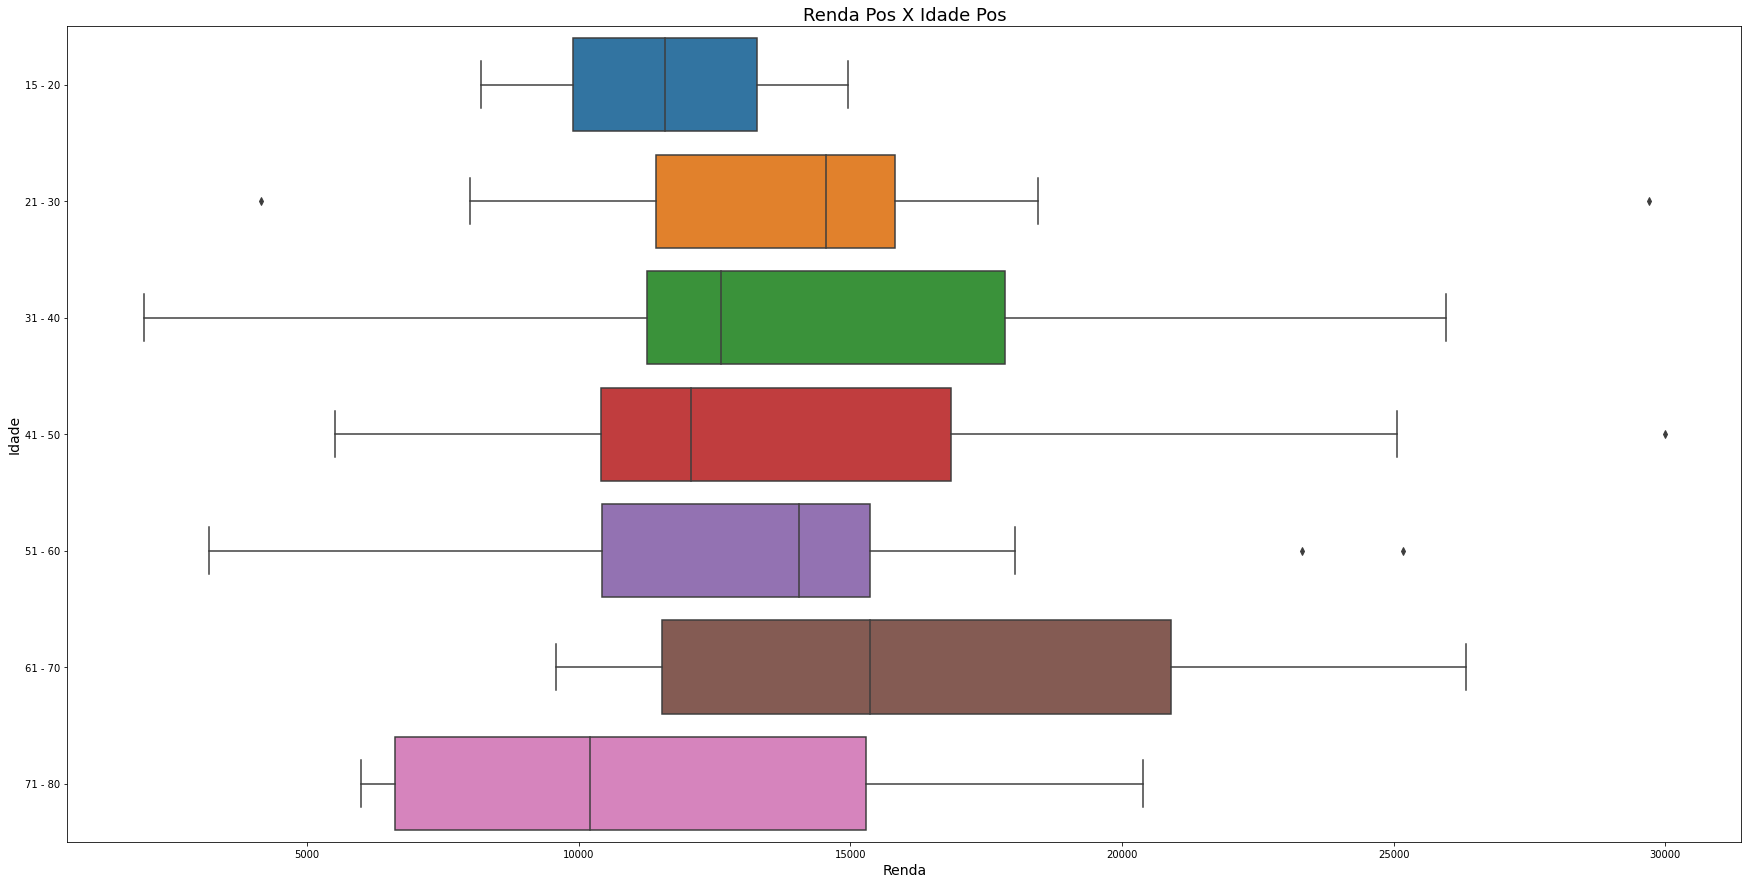

In [ ]:
ax = sns.boxplot(x = "renda", y = "idade_ranges", data = dados_pos, orient='h')
ax.figure.set_size_inches(30,15)
ax.set_title('Renda Pos X Idade Pos', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax.set_ylabel('Idade', fontsize=14)
ax

### Testes Estatísticos



*  H0: Pré = Pós
*  H1: Pré < Pós


R: As diferenças são significativas, pois rejeitamos H0 e concluímos que o perfil dos clientes nos aspectos de Idade e Renda, Pré e Pós Pandemia, são diferentes.



In [ ]:
grau_lib = len(dados_pre) + len(dados_pos) - 2
grau_lib

201

In [ ]:
#Ubtervalo de confiança: Idade Pré
norm.interval(0.95, loc=media_idade_pre, scale = dp_pre)

(10.56134095220839, 69.43865904779162)

In [ ]:
#Intervalode confiança: Renda Pré
norm.interval(0.95, loc=media_renda_pre, scale = dp_renda_pre)

(array([-2594.19643064]), array([20955.47643064]))

In [ ]:
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW
test_pre = DescrStatsW(dados_pre['idade'])
test_pos = DescrStatsW(dados_pos['idade'])
test = CompareMeans(test_pre, test_pos)
z_idade, p_valor_idade = test.ztest_ind(alternative = 'smaller', value=0)
z_idade

-2.5162646871061667

In [ ]:
p_valor_idade <= 0.95 

True

In [ ]:
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW
test_pre = DescrStatsW(dados_pre['renda'])
test_pos = DescrStatsW(dados_pos['renda'])
test = CompareMeans(test_pre, test_pos)
z_renda, p_valor_renda = test.ztest_ind(alternative = 'smaller', value=0)
z_renda

-5.853912096919386

In [ ]:
p_valor_renda <= 0.95

True

### 3. Tamanho da Amostra

e = margem de erro

N = tamanho da população

R: Para uma margem de erro de 2%, a base informada não é suficiente. Contudo, para uma margem de erro de 10%, é suficiente.

In [ ]:
def tamanho_amostra(e,N):

    n = (N / (1 + (N*(e**2))))

    return (n)

In [ ]:
e = 0.02
N = 100000  

print(tamanho_amostra(e, N))

In [ ]:
e = 0.1
N = 100000  

print(tamanho_amostra(e, N))

### Conclusões

- O perfil dos clientes Pré-Pandemia era composto por pessoas com média de idade de 40 anos, renda média de R$9.108,64, predominantemente das Regiões Sul (29%) e Nordeste (26%) e o produto com maior porcentagem de vendas era o batom (60%);

- O perfil dos clientes Pós-Pandemia é composto por pessoas com média de idade de 45 anos, renda média de R$13.968,50, predominantemente das Regiões Sul (41%) e Nordeste (25%) e o produto com maior porcentagem de vendas atualmente é o Desodorante (45%);

- É importante destacar que, atualmente, o segundo produto com maior porcentagem de vendas é o Antissinais (20%), podendo indicar que os clientes estão buscando mais produtos para fins de rejuvenescimento do que produtos da linha de maquiagem. 

## Testes de Hipóteses

### Desafio 1: Cosméticos

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O
Time de produtos dessa empresa está interessado criar novos batons com maior
durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.
Com isso, a empresa fez uma pesquisa com varias voluntárias e populou a base de dados (desafio_01_cosmeticos.csv) contendo as seguintes informacoes:

● id_produto: código identificador do produto, com a fórmula utilizada. Para
diferenciarmos se se trata do batom com a fórmula 1, 2 ou 3

● id_voluntária: código identificador da voluntária que utilizou o produto.

● durabilidade: quanto tempo o produto durou em horas.

● idade: idade da voluntária

● exposicao_sol: variável que indica 1 se a voluntária se expos ao sol 0 caso contrário.

De posse dessas informacoes, o time de produtos solicitou aos analistas de dados da empresa as seguintes perguntas a serem respondidas:

1 - Existe diferenca estatisticamente significativa na durabilidade dos batons com formulas diferentes?

2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com relacao a idade?

3- Qual fórmula de batom voce indicaria para consumidores que buscam maior
durabilidade e exposicao ao sol?


Material de apoio:
https://medium.com/rodrigo-lampier/usando-teste-de-hip%C3%B3teses-para-responder-quest%C3%B5es-de-neg%C3%B3cio-8a3d5ae9ebc0

### Desafio 2:

Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de
determinado produto, um novo picolé, tem uma distribuição normal com média igual a R$7,85 e desvio padrão igual a R$3,32. Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro.
Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista de dados.

Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52.

1. Voce pode concluir que existe diferenca de precos estatisticamente
relevante com 5% de significancia?

2. Qual o valor da variável teste, o intervalo de confianca e o p-valor?

Teste de Hipótese:

H0: A média de preço do novo picolé é de R$ 7,85

H1: A médica de preço do novo picolé é maior que R$ 7,85

In [ ]:
media_pop = 7.85
dp = 3.32
media_amostra = 11.52
n = 45
significancia = 0.05

In [ ]:
z = (media_amostra - media_pop) / (dp/np.sqrt(n))
z

7.415394106106231

In [ ]:
#Calculando o intervalo de confiança
norm.interval(alpha=0.95, loc=media_amostra, scale=dp)

<ipython-input-7-42a23cc84c3b>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  norm.interval(alpha=0.95, loc=media_amostra, scale=dp)


(5.0129195713270205, 18.027080428672978)

In [ ]:
#Calculando p_valor
p_valor = 2*(norm.sf(z))
p_valor

1.2126366281061861e-13

In [ ]:
p_valor <= significancia

True

### Conclusão

Ao rejeitarmos H0, podemos concluir que existem diferenças releventes de preço do novo picolé em diferentes cidades.

## Correlação e Regressão 

## Desafio:

Suponha que você trabalha em uma empresa do setor imobiliário. Para essa empresa é muito importante precificar corretamente o imóvel, caso contrário, os corretores podem perder a venda. 
Como parte do time de dados você é responsável por analisar os principais fatores que podem afetar o preço dos imóveis. Para isso, eles te enviaram a base de dados (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?

Para responder esse desafio: A base de dados: desafio_01_preco_imoveis.csv contém as seguintes informações:

● id : código identificador do imóvel

● date: data em que o imóvel foi cadastrado

● price: preço do imóvel

● bedrooms: número de quartos

● bathrooms: número de banheiros

● sqft_living: tamanho do imóvel (dentro da casa)

● sqft_lot: tamanho do lote / terreno

● floors: andares

● waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso
contrário.

● view: indica o número de quartos com vista.

● condition: condição do imóvel, escala de 1 a 5

● grade: nota do imóvel

● sqft_above: tamanho da casa acima do solo (excluindo porão)

● sqft_basement: tamanho do porão

● yr_built: ano em que a casa foi construída

● yr_renovated: ano em que a casa foi renovada

● zipcode: "CEP" do imóvel

● lat: latitude do imóvel

● long: longitude do imóvel

1 - Analise a correlação de todas as variáveis com o preço do imóvel. Quais
variáveis são mais correlacionadas? Quais são menos correlacionadas?

2 - Para as top 5 variáveis mais correlacionadas com o preço:
1. plote as suas distribuições (histograma e boxplot)
2. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a
variável correlacionada no eixo X.
3. para cada uma das 5 variáveis faça uma regressão linear simples sendo
preciso a variável resposta (y) e interprete os resultados.

In [ ]:
dados_imoveis = pd.read_csv('dados_imoveis.csv')

In [ ]:
dados_imoveis.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long'],
      dtype='object')

In [ ]:
colunas_imoveis = {
    'id': 'id', 
    'date':'data', 
    'price': 'valor', 
    'bedrooms': 'quartos', 
    'bathrooms': 'banheiros', 
    'sqft_living': 'dimensao_casa',
    'sqft_lot': 'dimensao_terreno', 
    'floors': 'andares', 
    'waterfront': 'vista_mar', 
    'view':'quartos_vista', 
    'condition': 'condicao', 
    'grade': 'nota',
    'sqft_above': 'dimensao_solo', 
    'sqft_basement': 'dimensao_porao', 
    'yr_built': 'ano_construcao', 
    'yr_renovated': 'ano_reforma',
    'zipcode': 'CEP',
    'lat': 'latitude', 
    'long': 'longitude'
}

In [ ]:
dados_imoveis = pd.DataFrame(dados_imoveis.rename(columns = colunas_imoveis))
dados_imoveis

,id,data,valor,quartos,banheiros,dimensao_casa,dimensao_terreno,andares,vista_mar,quartos_vista,condicao,nota,dimensao_solo,dimensao_porao,ano_construcao,ano_reforma,CEP,latitude,longitude
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069


In [ ]:
dados_imoveis2 = dados_imoveis.drop(columns = ['data', 'CEP', 'latitude', 'longitude'])
dados_imoveis2

,id,valor,quartos,banheiros,dimensao_casa,dimensao_terreno,andares,vista_mar,quartos_vista,condicao,nota,dimensao_solo,dimensao_porao,ano_construcao,ano_reforma
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0


In [ ]:
media_valor= dados_imoveis2['valor'].mean().round(3)
max_valor = dados_imoveis2['valor'].max().round(3)
min_valor = dados_imoveis2['valor'].min().round(3)
dp_valor = dados_imoveis2['valor'].std().round(2)
var_valor = dados_imoveis2['valor'].var().round(2)

In [ ]:
metricas_valor = pd.DataFrame({'Métricas Valor': ['Média', 'Máx', 'Mín', 'Desvio Padrão', 'Variância'], 
                         'Valor': [media_valor, max_valor, min_valor, dp_valor, var_valor]})
metricas_valor.set_index('Métricas Valor')

,Valor
Métricas Valor,
Média,5.400881e+05
Máx,7.700000e+06
Mín,7.500000e+04
Desvio Padrão,3.671272e+05
Variância,1.347824e+11


In [ ]:
ranges = [0, 1000000, 5000000, 8000000]
dados_imoveis2['valor_ranges'] = pd.cut(dados_imoveis2['valor'], bins=ranges, labels=['0$ - $1M', '$1.1M - $5M', '$5.1M - $8M'])
dados_imoveis2

,id,valor,quartos,banheiros,dimensao_casa,dimensao_terreno,andares,vista_mar,quartos_vista,condicao,nota,dimensao_solo,dimensao_porao,ano_construcao,ano_reforma,valor_ranges
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,0$ - $1M
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,0$ - $1M
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,0$ - $1M
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,0$ - $1M
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,0$ - $1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,0$ - $1M
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,0$ - $1M
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,0$ - $1M
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,0$ - $1M


### 1. Correlação Variaveis X Preço

In [ ]:
correlacao_imoveis = dados_imoveis2[['id', 'valor', 'quartos', 'banheiros', 'dimensao_casa',
       'dimensao_terreno', 'andares', 'vista_mar', 'quartos_vista', 'condicao',
       'nota', 'dimensao_solo', 'dimensao_porao', 'ano_construcao',
       'ano_reforma']].corr()
correlacao_valor = correlacao_imoveis.iloc[2:,:2]
correlacao_valor = correlacao_valor.drop(columns=['id'])
correlacao_valor

,valor
quartos,0.308350
banheiros,0.525138
dimensao_casa,0.702035
dimensao_terreno,0.089661
andares,0.256794
vista_mar,0.266369
quartos_vista,0.397293
condicao,0.036362
nota,0.667434
dimensao_solo,0.605567


In [ ]:
# 5 Variáveis mais correlacionadas
correlacao_valor = correlacao_valor.sort_values(by='valor', ascending=False)
correlacao_valor.head(5)

,valor
dimensao_casa,0.702035
nota,0.667434
dimensao_solo,0.605567
banheiros,0.525138
quartos_vista,0.397293


In [ ]:
# 5 Variáveis menos correlacionadas
correlacao_valor.tail(5)

,valor
andares,0.256794
ano_reforma,0.126434
dimensao_terreno,0.089661
ano_construcao,0.054012
condicao,0.036362


### 2. Análises Gráficas

### Histogramas e Boxplots





/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição da Dimensão da Casa'}, xlabel='Dimensão', ylabel='Density'>

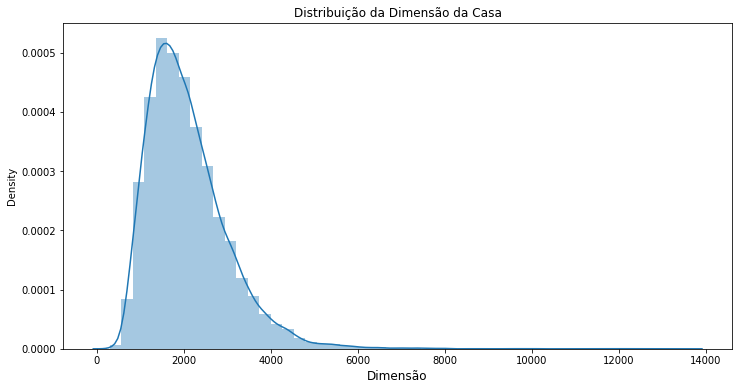

In [ ]:
ax = sns.distplot(x = dados_imoveis2['dimensao_casa'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da Dimensão da Casa', fontsize = 12)
ax.set_xlabel('Dimensão', fontsize = 12)
ax

<AxesSubplot:title={'center':'Valor X Dimensão da Casa'}, xlabel='Dimensão', ylabel='Valor'>

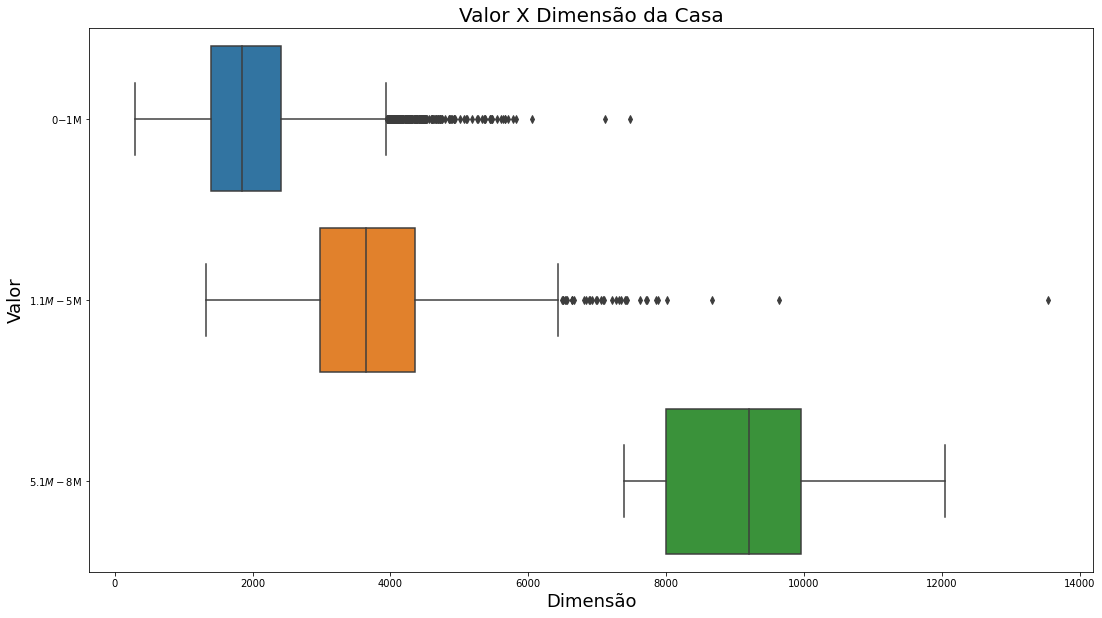

In [ ]:
ax = sns.boxplot(x = "dimensao_casa", y = "valor_ranges", data = dados_imoveis2, orient='h')
ax.figure.set_size_inches(18,10)
ax.set_title('Valor X Dimensão da Casa', fontsize=20)
ax.set_xlabel('Dimensão', fontsize=18)
ax.set_ylabel('Valor', fontsize=18)
ax

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição das Notas das Casas'}, xlabel='Nota', ylabel='Density'>

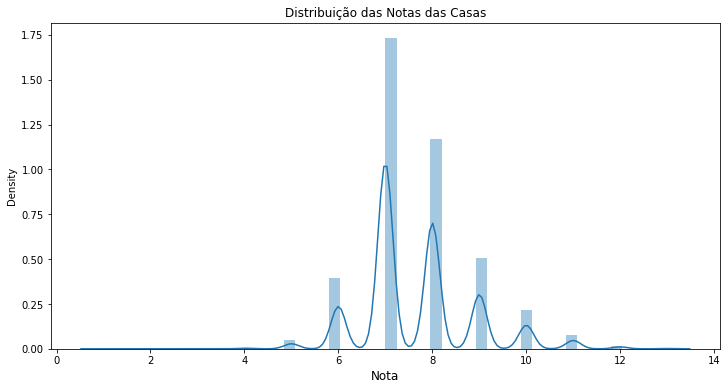

In [ ]:
ax = sns.distplot(x = dados_imoveis2['nota'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das Notas das Casas', fontsize = 12)
ax.set_xlabel('Nota', fontsize = 12)
ax

<AxesSubplot:title={'center':'Valor X Nota da Casa'}, xlabel='Nota', ylabel='Valor'>

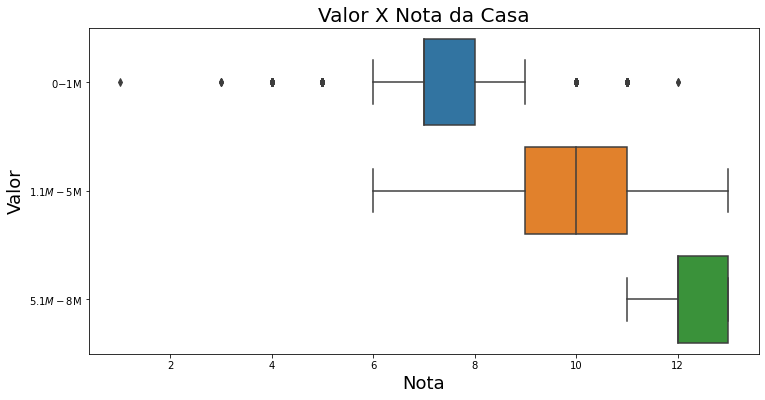

In [ ]:
ax = sns.boxplot(x = "nota", y = "valor_ranges", data = dados_imoveis2, orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('Valor X Nota da Casa', fontsize=20)
ax.set_xlabel('Nota', fontsize=18)
ax.set_ylabel('Valor', fontsize=18)
ax

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição da Dimensão das Casas sem o Porão'}, xlabel='Dimensão', ylabel='Density'>

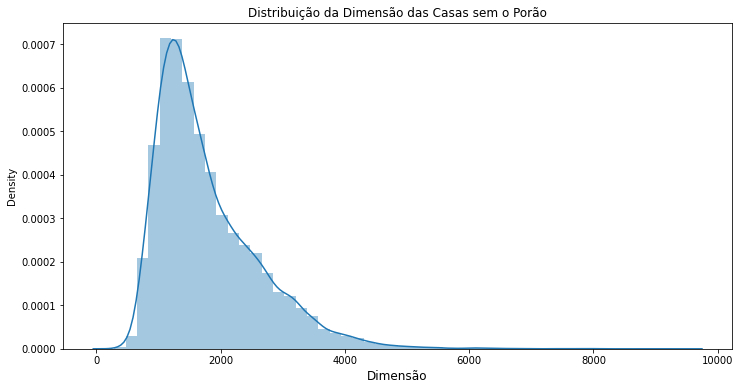

In [ ]:
ax = sns.distplot(x = dados_imoveis2['dimensao_solo'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da Dimensão das Casas sem o Porão', fontsize = 12)
ax.set_xlabel('Dimensão', fontsize = 12)
ax

<AxesSubplot:title={'center':'Valor X Dimensão sem Porão'}, xlabel='Dimensão ', ylabel='Valor'>

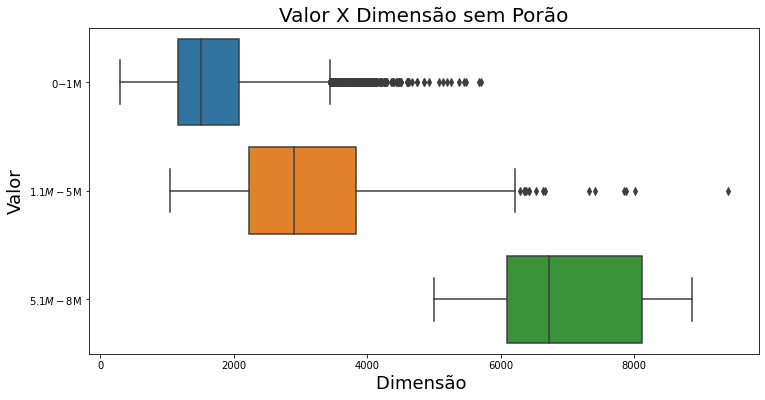

In [ ]:
ax = sns.boxplot(x = "dimensao_solo", y = "valor_ranges", data = dados_imoveis2, orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('Valor X Dimensão sem Porão', fontsize=20)
ax.set_xlabel('Dimensão ', fontsize=18)
ax.set_ylabel('Valor', fontsize=18)
ax

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição da Quantidade de Banheiros'}, xlabel='Números de Banheiros', ylabel='Density'>

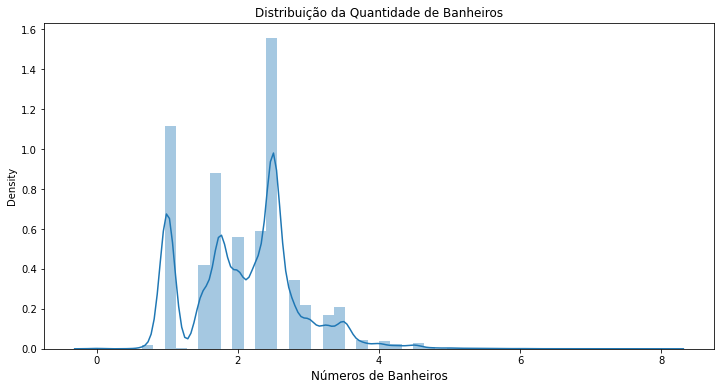

In [ ]:
ax = sns.distplot(x = dados_imoveis2['banheiros'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da Quantidade de Banheiros', fontsize = 12)
ax.set_xlabel('Números de Banheiros', fontsize = 12)
ax

<AxesSubplot:title={'center':'Valor X Quantidade de Banheiros'}, xlabel='Banheiros ', ylabel='Valor'>

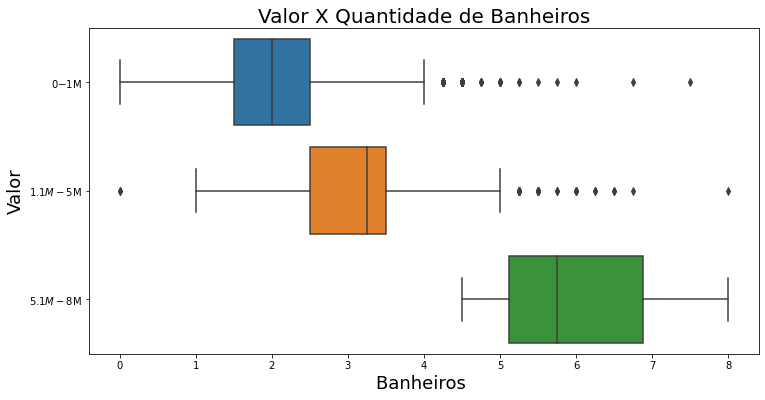

In [ ]:
ax = sns.boxplot(x = "banheiros", y = "valor_ranges", data = dados_imoveis2, orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('Valor X Quantidade de Banheiros', fontsize=20)
ax.set_xlabel('Banheiros ', fontsize=18)
ax.set_ylabel('Valor', fontsize=18)
ax

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição da Quantidade de Quartos com vista'}, xlabel='Números de Quartos', ylabel='Density'>

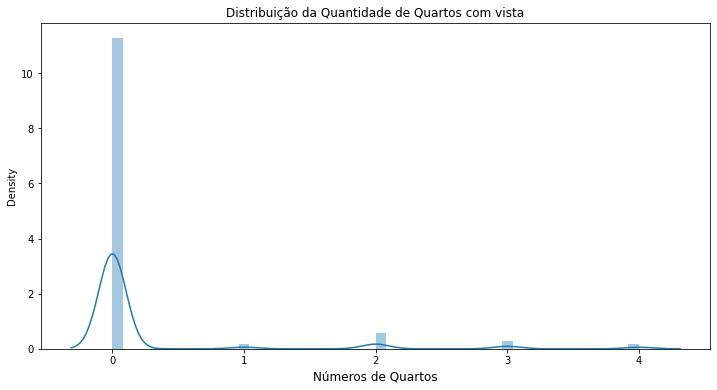

In [ ]:
ax = sns.distplot(x = dados_imoveis2['quartos_vista'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da Quantidade de Quartos com vista', fontsize = 12)
ax.set_xlabel('Números de Quartos', fontsize = 12)
ax

<AxesSubplot:title={'center':'Valor X Quantidade de Quartos com Vista'}, xlabel='Quartos', ylabel='Valor'>

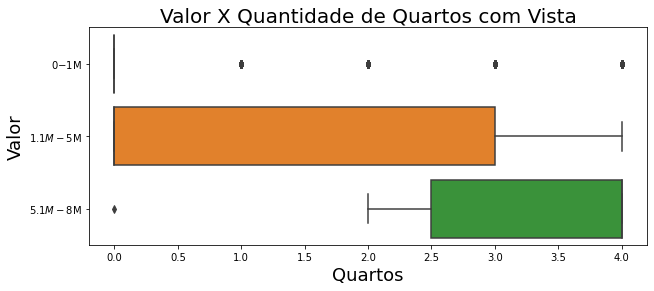

In [ ]:
ax = sns.boxplot(x = "quartos_vista", y = "valor_ranges", data = dados_imoveis2, orient='h')
ax.figure.set_size_inches(10,4)
ax.set_title('Valor X Quantidade de Quartos com Vista', fontsize=20)
ax.set_xlabel('Quartos', fontsize=18)
ax.set_ylabel('Valor', fontsize=18)
ax

### ScatterPlots

In [ ]:
max_dimensao_casa = dados_imoveis2['dimensao_casa'].max()
min_dimensao_casa = dados_imoveis2['dimensao_casa'].min()
media_dimensao_casa = dados_imoveis2['dimensao_casa'].mean()


In [ ]:
max_nota = dados_imoveis2['nota'].max()
min_nota = dados_imoveis2['nota'].min()
media_nota = dados_imoveis2['nota'].mean()

In [ ]:
max_dimensao_solo = dados_imoveis2['dimensao_solo'].max()
min_dimensao_solo = dados_imoveis2['dimensao_solo'].min()
media_dimensao_solo = dados_imoveis2['dimensao_solo'].mean()

In [ ]:
max_banheiros = dados_imoveis2['banheiros'].max()
min_banheiros = dados_imoveis2['banheiros'].min()
media_banheiros = dados_imoveis2['banheiros'].mean()

In [ ]:
max_quartos_vista = dados_imoveis2['quartos_vista'].max()
min_quartos_vista = dados_imoveis2['quartos_vista'].min()
media_quartos_vista = dados_imoveis2['quartos_vista'].mean()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Correlação entre a Dimensão e Valor do Imóvel'}, xlabel='dimensao_casa', ylabel='valor'>

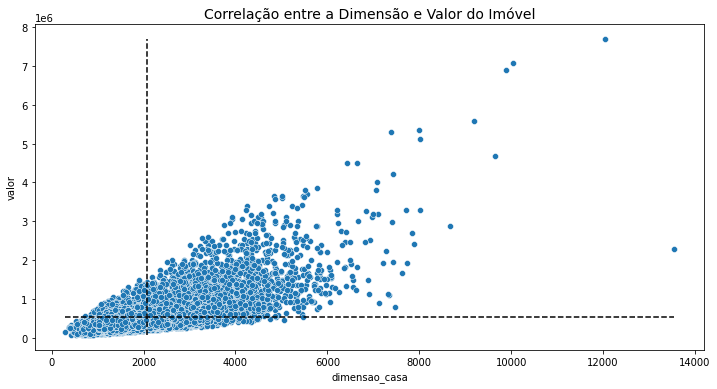

In [ ]:
#Dimensao Casa
x = dados_imoveis2['dimensao_casa']
y = dados_imoveis2['valor']

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(12, 6)
ax.set_title('Correlação entre a Dimensão e Valor do Imóvel', fontsize=14)
ax.hlines(y = media_valor, xmin=min_dimensao_casa, xmax=max_dimensao_casa, colors='black', linestyles='dashed')
ax.vlines(x = media_dimensao_casa, ymin=min_valor, ymax=max_valor, colors='black', linestyles='dashed')
ax

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Correlação entre Nota e Valor do Imóvel'}, xlabel='nota', ylabel='valor'>

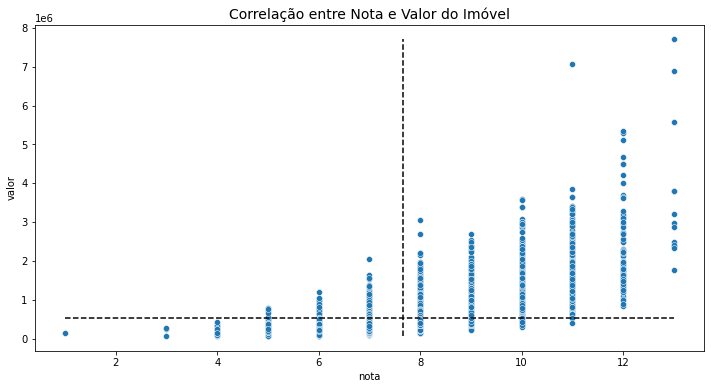

In [ ]:
#Nota
x = dados_imoveis2['nota']
y = dados_imoveis2['valor']

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(12, 6)
ax.set_title('Correlação entre Nota e Valor do Imóvel', fontsize=14)
ax.hlines(y = media_valor, xmin=min_nota, xmax=max_nota, colors='black', linestyles='dashed')
ax.vlines(x = media_nota, ymin=min_valor, ymax=max_valor, colors='black', linestyles='dashed')
ax

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Correlação entre a Dimensão sem o Porão e Valor do Imóvel'}, xlabel='dimensao_solo', ylabel='valor'>

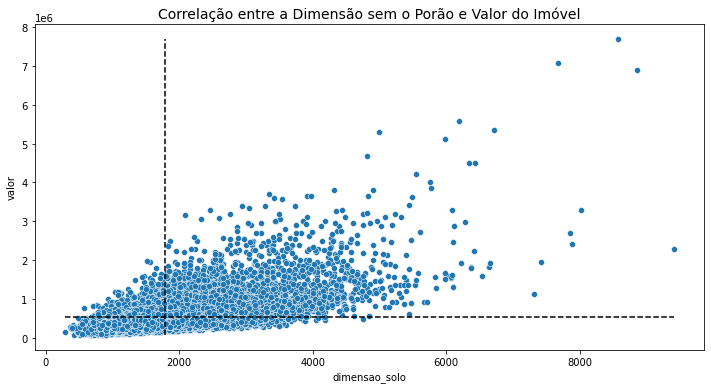

In [ ]:
#Dimensao Solo
x = dados_imoveis2['dimensao_solo']
y = dados_imoveis2['valor']

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(12, 6)
ax.set_title('Correlação entre a Dimensão sem o Porão e Valor do Imóvel', fontsize=14)
ax.hlines(y = media_valor, xmin=min_dimensao_solo, xmax=max_dimensao_solo, colors='black', linestyles='dashed')
ax.vlines(x = media_dimensao_solo, ymin=min_valor, ymax=max_valor, colors='black', linestyles='dashed')
ax

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Correlação entre a Quantidade de Banheiros e Valor do Imóvel'}, xlabel='banheiros', ylabel='valor'>

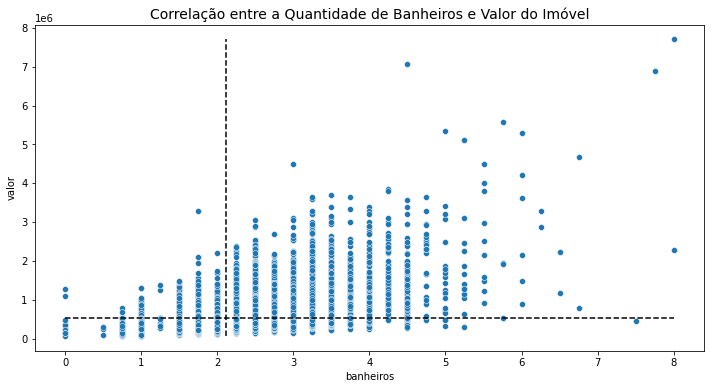

In [ ]:
#Banheiros
x = dados_imoveis2['banheiros']
y = dados_imoveis2['valor']

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(12, 6)
ax.set_title('Correlação entre a Quantidade de Banheiros e Valor do Imóvel', fontsize=14)
ax.hlines(y = media_valor, xmin=min_banheiros, xmax=max_banheiros, colors='black', linestyles='dashed')
ax.vlines(x = media_banheiros, ymin=min_valor, ymax=max_valor, colors='black', linestyles='dashed')
ax

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Correlação entre a Quantidade de Quartos com vista e Valor do Imóvel'}, xlabel='quartos_vista', ylabel='valor'>

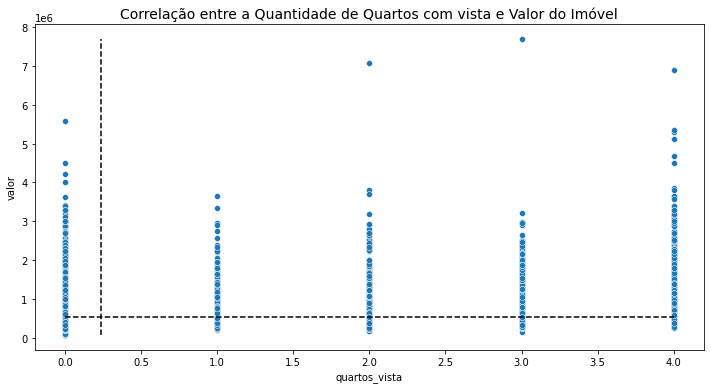

In [ ]:
#Quartos com vista
x = dados_imoveis2['quartos_vista']
y = dados_imoveis2['valor']

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(12, 6)
ax.set_title('Correlação entre a Quantidade de Quartos com vista e Valor do Imóvel', fontsize=14)
ax.hlines(y = media_valor, xmin=min_quartos_vista, xmax=max_quartos_vista, colors='black', linestyles='dashed')
ax.vlines(x = media_quartos_vista, ymin=min_valor, ymax=max_valor, colors='black', linestyles='dashed')
ax

### Regressões Lineares Simples


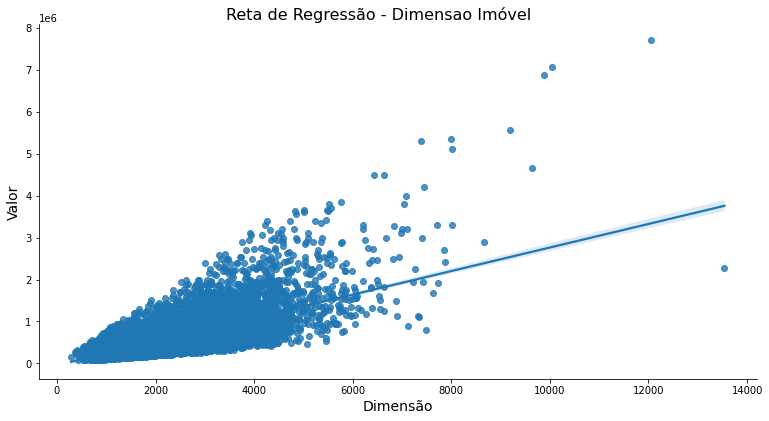

In [ ]:
#Dimensão do Imóvel
ax = sns.lmplot(x = 'dimensao_casa', y = 'valor', data=dados_imoveis2)
ax.figure.set_size_inches(12,6)
ax.fig.suptitle('Reta de Regressão - Dimensao Imóvel', fontsize=16)
ax.set_xlabels('Dimensão', fontsize=14)
ax.set_ylabels('Valor', fontsize=14)
ax

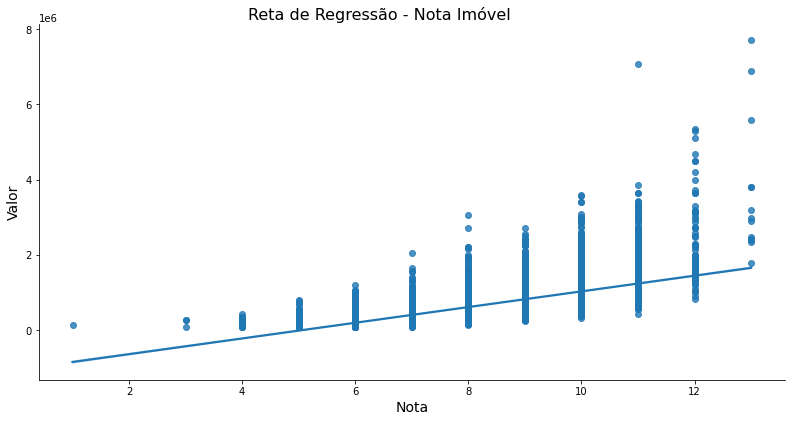

In [ ]:
#Nota do Imóvel
ax = sns.lmplot(x = 'nota', y = 'valor', data=dados_imoveis2)
ax.figure.set_size_inches(12,6)
ax.fig.suptitle('Reta de Regressão - Nota Imóvel', fontsize=16)
ax.set_xlabels('Nota', fontsize=14)
ax.set_ylabels('Valor', fontsize=14)
ax

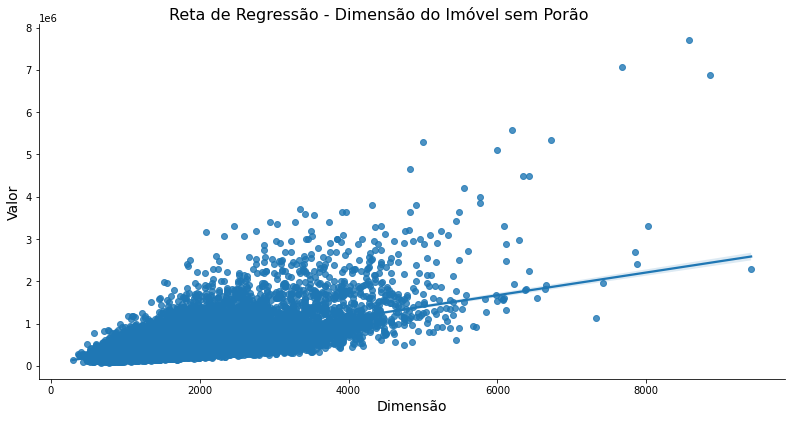

In [ ]:
#Dimensão Imóvel sem Porão
ax = sns.lmplot(x = 'dimensao_solo', y = 'valor', data=dados_imoveis2)
ax.figure.set_size_inches(12,6)
ax.fig.suptitle('Reta de Regressão - Dimensão do Imóvel sem Porão', fontsize=16)
ax.set_xlabels('Dimensão', fontsize=14)
ax.set_ylabels('Valor', fontsize=14)
ax

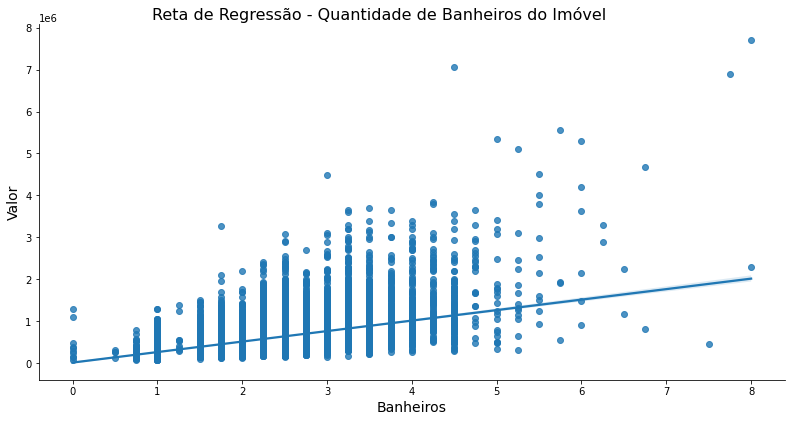

In [ ]:
#Quantidade de Banheiros
ax = sns.lmplot(x = 'banheiros', y = 'valor', data=dados_imoveis2)
ax.figure.set_size_inches(12,6)
ax.fig.suptitle('Reta de Regressão - Quantidade de Banheiros do Imóvel', fontsize=16)
ax.set_xlabels('Banheiros', fontsize=14)
ax.set_ylabels('Valor', fontsize=14)
ax

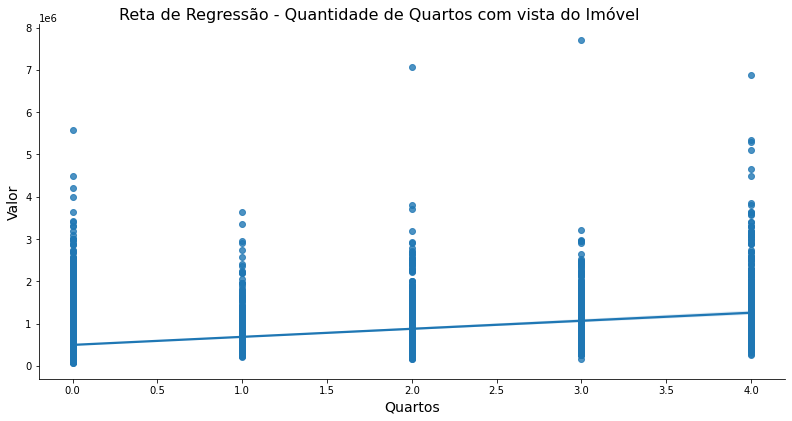

In [ ]:
#Quantidade de Quartos com Vista

ax = sns.lmplot(x = 'quartos_vista', y = 'valor', data=dados_imoveis2)
ax.figure.set_size_inches(12,6)
ax.fig.suptitle('Reta de Regressão - Quantidade de Quartos com vista do Imóvel', fontsize=16)
ax.set_xlabels('Quartos', fontsize=14)
ax.set_ylabels('Valor', fontsize=14)
ax

### Obtendo os Coeficientes de Determinação (R²)

In [ ]:
y = dados_imoveis2['valor']
x = sm.add_constant(dados_imoveis2['dimensao_casa'])

resultado_regressao = sm.OLS(y, x).fit()
resultado_regressao.params

R2_dimensao_casa = resultado_regressao.rsquared
print('{:.2f}% do Valor do Imóvel pode ser explicado pela Dimensão dele.'.format(R2_dimensao_casa*100))

In [ ]:
y = dados_imoveis2['valor']
x = sm.add_constant(dados_imoveis2['nota'])

resultado_regressao_nota = sm.OLS(y, x).fit()
resultado_regressao_nota.params

R2_nota = resultado_regressao_nota.rsquared
print('{:.2f}% do preço do Imóvel pode ser explicado pela Nota que recebeu.'.format(R2_nota*100))

In [ ]:
y = dados_imoveis2['valor']
x = sm.add_constant(dados_imoveis2['dimensao_solo'])

resultado_regressao_solo = sm.OLS(y, x).fit()
resultado_regressao_solo.params

R2_dimensao_solo = resultado_regressao_solo.rsquared
print('{:.2f}% do preço do Imóvel pode ser explicado pela Dimensão do imóvel sem o Porão.'.format(R2_dimensao_solo*100))

In [ ]:
y = dados_imoveis2['valor']
x = sm.add_constant(dados_imoveis2['banheiros'])

resultado_regressao_banheiros = sm.OLS(y, x).fit()
resultado_regressao_banheiros.params

R2_banheiros = resultado_regressao_banheiros.rsquared
print('{:.2f}% do preço do Imóvel pode ser explicado pela Quantidade de Banheiros.'.format(R2_banheiros*100))

In [ ]:
y = dados_imoveis2['valor']
x = sm.add_constant(dados_imoveis2['quartos_vista'])

resultado_regressao_vista = sm.OLS(y, x).fit()
resultado_regressao_vista.params

R2_quartos_vista = resultado_regressao_vista.rsquared
print('{:.2f}% do preço do Imóvel pode ser explicado pela Quantidade de Quartos com vista.'.format(R2_quartos_vista*100))

### Conclusões

- O tamanho do imóvel e a nota recebida são os principais fatores que podem ser utilizados para precificar corretamente os imóveis.

## Modelos Regressivos